(350,)


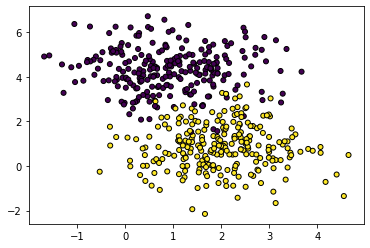

In [2]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept
print(y_train.shape)

Cost at iteration 0 24.26015131959808
Cost at iteration 500 15.433017419013229
Cost at iteration 1000 11.486212825592759
Cost at iteration 1500 7.062876824584021
Cost at iteration 2000 7.889654495438582
Cost at iteration 2500 6.503299652348029
Cost at iteration 3000 6.757718227864469
Cost at iteration 3500 2.929168429545964
Cost at iteration 4000 6.391181484340702
Cost at iteration 4500 7.585073157096397
Cost at iteration 5000 1.9340855579627994
Cost at iteration 5500 4.6363447073300925
Cost at iteration 6000 4.51105526092142
Cost at iteration 6500 3.70088671839832
Cost at iteration 7000 8.28758060542922
Cost at iteration 7500 3.5787273810798044
Cost at iteration 8000 1.5124710937763672
Cost at iteration 8500 4.544674847552099
Cost at iteration 9000 3.620684988402142
Cost at iteration 9500 4.793282583831072
Cost at iteration 10000 4.444688086998274
Cost at iteration 10500 4.211086922203347
Cost at iteration 11000 3.4282830543910707
Cost at iteration 11500 5.379876900122513
Cost at iter

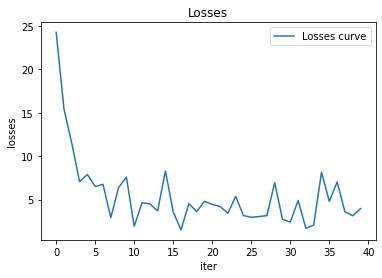

In [3]:
class LogisticRegression:
    
    def __init__(self, max_iter=20000,alpha = 0.0001):
        self.alpha = alpha
        self.max_iter = max_iter
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        batch_size = int(0.1 * X.shape[0])
        self.loss_curve = []
        for i in range(self.max_iter):
            ix = np.random.randint(0, X.shape[0]) #<----with replacement
            batch_X = X[ix:ix+batch_size]
            batch_y = y[ix:ix+batch_size]
            cost, grad = self.gradient(batch_X, batch_y)
            if i % 500 == 0:
                print(f"Cost at iteration {i}", cost)
                self.loss_curve.append(cost)
            self.w = self.w - self.alpha * grad

    def gradient(self, X, y):
        m = X.shape[0]
        h = self.h_theta(X)
        error = h - y
        # putting negative sign for negative log likelihood
        cost = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return cost, grad

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    def h_theta(self, X):
        return self.sigmoid(X @ self.w)

    def output(self, pred):
        return np.round(self.h_theta(pred))
    
    def plot(self):
        plt.plot(np.arange(len(self.loss_curve)) , self.loss_curve, label = "Losses curve")
        plt.title("Losses")
        plt.xlabel("iter")
        plt.ylabel("losses")
        plt.legend()

model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.output(X_test)
model.plot()

In [11]:
class classification_report:
    def __init__(self,yhat,y_test):
        self.yhat = yhat
        self.y_test = y_test
        
        self.TP = sum((self.yhat==1)&(self.y_test==1))
        self.FP = sum((self.yhat==1)&(self.y_test==0))
        self.FN = sum((self.yhat==0)&(self.y_test==1))
        self.TN = sum((self.yhat==0)&(self.y_test==0))
        #print(self.TP)
        #print(self.FP)
        #print(self.FN)
        #print(self.TN)
    def accuracy(self):
        self.accuracy = (self.TP + self.TN)/(self.TP + self.TN + self.FP + self.FN)
        return self.accuracy
    def precision(self):
        self.precision = self.TP/(self.TP + self.FP)
        return self.precision
    def recall(self):
        self.recall = self.TP/(self.TP + self.FN)
        return self.recall
    def F1(self):
        self.F1 = 2*((self.precision*self.recall)/(self.precision+self.recall))
        return self.F1
c = classification_report(yhat,y_test)
print("The accuracy is", c.accuracy())
print("The precision is", c.precision())
print("The recall is", c.recall())
print("The F1 is", c.F1())
        

The accuracy is 0.9533333333333334
The precision is 0.9605263157894737
The recall is 0.948051948051948
The F1 is 0.9542483660130718
